In [39]:
import numpy as np
from matplotlib import pyplot as plt
import os 

In [65]:
T = 100 # number of timepoints
#w_real = np.array([0.0, 0.0])
w_real = np.array([0.1])

def make_arp(w_real, T):
    p = len(w_real)
    add_noise = np.random.randn(T) # noise at each timepoint
    signal = np.zeros(T)
    signal[:p] = add_noise[:p]
    w = w_real[::-1]

    for t in range(p, T):
        signal[t] = np.dot(w, signal[t-p:t]) + add_noise[t]
    return signal

def make_arp_vec(w_real, n, T):
    return np.vstack([make_arp(w_real, T) for _ in range(n)]).T

In [40]:
os.getcwd()

'/Users/jiamingxu/Desktop/Language_straightenting'

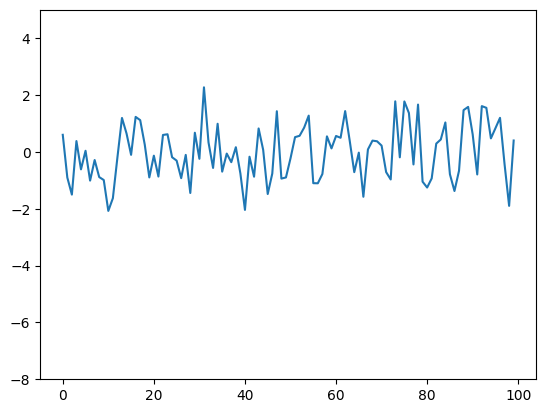

In [69]:
plt.plot(make_arp_vec(w_real, 1, 100));
plt.ylim(-8, 5) 
plt.savefig("AR(1)_fast.pdf", format='pdf', bbox_inches='tight')

In [35]:
# Compute the (expected) power spectrum from the AR coefficients
f = np.linspace(0, 0.5, 100) # frequencies up to Nyquist
S_ar = 1 / np.abs(1 - np.array([w_real[k] * np.exp(-2j * np.pi * (k+1) * f) 
                                for k in range(len(w_real))]).sum(0))**2

/var/folders/gq/_9ggz_gd2y57qgdgg8jsdz0r0000gp/T/ipykernel_82422/1300797448.py:3: RuntimeWarning: divide by zero encountered in divide
  S_ar = 1 / np.abs(1 - np.array([w_real[k] * np.exp(-2j * np.pi * (k+1) * f)


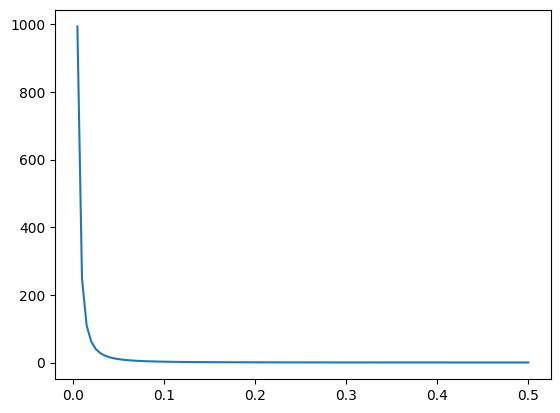

In [6]:
plt.plot(f, np.abs(S_ar))

In [7]:
# compute (average) curvature from a set of observations
def curvature(X):
    V = X[1:] - X[:-1]
    norms = np.sqrt((V**2).sum(1))
    dots = (V[1:] * V[:-1]).sum(1)
    coss = dots / (norms[1:] * norms[:-1])
    #print(coss)
    angles = np.arccos(coss)
    return angles.mean()

(0.0, 180.0)

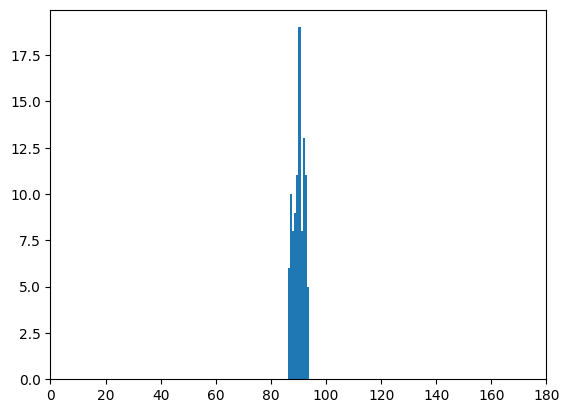

In [8]:
# run a few simulations with w_real to see what the values look like
nsim = 100
degs = np.array([np.rad2deg(curvature(make_arp_vec(w_real, 10, 100))) for _ in range(nsim)])

plt.hist(degs);
plt.xlim(0, 180)

In [9]:
# simulate AR(1) processes with different coefficients!

nsim = 100
alphas = np.linspace(0, 1, 10)
all_degs = []
for a in alphas:
    degs = np.array([np.rad2deg(curvature(make_arp_vec([a], 10, 100))) for _ in range(nsim)])
    all_degs.append(degs)
all_degs = np.array(all_degs)

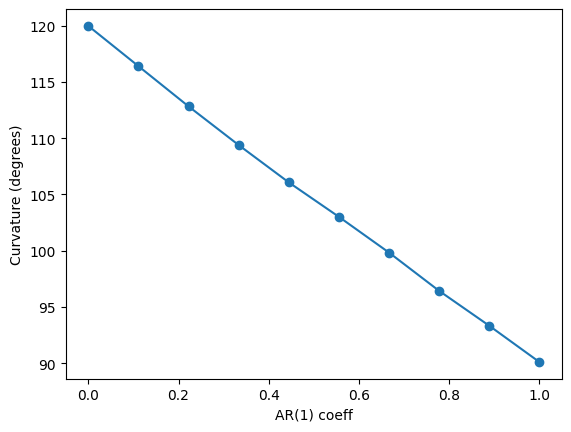

In [10]:
plt.plot(alphas, all_degs.mean(1), 'o-')
plt.xlabel("AR(1) coeff")
plt.ylabel("Curvature (degrees)")
plt.savefig("curvature-AR.pdf", format='pdf', bbox_inches='tight')

$$ x_t = \alpha x_{t-1} + \epsilon_t$$